In [1]:
import pandas as pd

In [2]:
conferences = pd.read_csv("Conferences_with_keywords.csv")
conferences

Title  \
0         2025 PCI SSC North America Community Meeting   
1                2025 PCI SSC Europe Community Meeting   
2          2025 PCI SSC Asia-Pacific Community Meeting   
3                                  RSA Conference 2025   
4                        Innovate Cybersecurity Summit   
..                                                 ...   
232              Virginia HIMSS Annual Fall Conference   
233                                      GNUHealth Con   
234                                AIMed Global Summit   
235  International Conference on Nursing and Health...   
236                           Healthcare Summit London   

                                                  Link                Type  \
0            https://events.pcisecuritystandards.org/#       CyberSecurity   
1            https://events.pcisecuritystandards.org/#       CyberSecurity   
2            https://events.pcisecuritystandards.org/#       CyberSecurity   
3                    https://www.rsaconference.com/usa       CyberSecurity   
4             https://innovatecybersecuritysummit.com/       CyberSecurity   
..                                                 ...                 ...   
232                            https://www.vahimss.org  Health Informatics   
233                       https://www.gnuhealthcon.org  Health Informatics   
234                               https://aimed.events  Health Informatics   
235                  https://www.nursingconference.com  Health Informatics   
236  https://thenueconomy.com/top-global-health-tec...  Health Informatics   

                                              Keywords  
0    pci ssc, payment security, security standards,...  
1    pci security standards council, payment securi...  
2    pci security standards council, payment data, ...  
3    rsac conference, cybersecurity, conference age...  
4    cybersecurity, cybersecurity events, summits, ...  
..                                                 ...  
232  himss, healthcare it, information security, da...  
233  gnu health, orthanc, international conference,...  
234  artificial intelligence (ai), medicine, ai in ...  
235  nursing conferences, healthcare, nursing care,...  
236  healthcare, global health, events, strategic b...  

[237 rows x 4 columns]

In [3]:
by_type = conferences.groupby('Type')['Keywords'].apply(lambda x: ', '.join(x))
by_type

Type
AI-ML                 artificial intelligence, machine learning, sta...
CyberSecurity         pci ssc, payment security, security standards,...
Health Informatics    himss, global health conference, healthcare, h...
Name: Keywords, dtype: object

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import FancyBboxPatch
import seaborn as sns

In [5]:
def create_network_graph(data_dict, save_path=None):
    """
    Create a network graph from category-keyword data
    
    Args:
        data_dict: Dictionary with categories as keys and comma-separated keywords as values
        save_path: Optional path to save the graph image
    """
    
    # Create a new graph
    G = nx.Graph()
    
    # Color palette for different categories
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']
    category_colors = {}
    
    # Process each category and its keywords
    for i, (category, keywords_str) in enumerate(data_dict.items()):
        # Assign color to category
        category_colors[category] = colors[i % len(colors)]
        
        # Add category node
        G.add_node(category, node_type='category', color=category_colors[category])
        
        # Split keywords and clean them
        keywords = [kw.strip() for kw in keywords_str.split(',') if kw.strip()]
        
        # Add keyword nodes and edges
        for keyword in keywords:
            G.add_node(keyword, node_type='keyword', category=category)
            G.add_edge(category, keyword)
    
    # Create the visualization
    plt.figure(figsize=(16, 12))
    
    # Use spring layout for better node positioning
    pos = nx.spring_layout(G, k=3, iterations=50, seed=42)
    
    # Separate nodes by type
    category_nodes = [node for node, attr in G.nodes(data=True) if attr.get('node_type') == 'category']
    keyword_nodes = [node for node, attr in G.nodes(data=True) if attr.get('node_type') == 'keyword']
    
    # Draw edges first (so they appear behind nodes)
    nx.draw_networkx_edges(G, pos, alpha=0.6, width=1.5, edge_color='gray')
    
    # Draw category nodes (larger, colored)
    for category in category_nodes:
        nx.draw_networkx_nodes(G, pos, nodelist=[category], 
                             node_color=category_colors[category],
                             node_size=3000, alpha=0.9, 
                             edgecolors='white', linewidths=3)
    
    # Draw keyword nodes (smaller, lighter colors)
    for keyword in keyword_nodes:
        category = G.nodes[keyword]['category']
        color = category_colors[category]
        # Make keyword nodes lighter version of category color
        light_color = plt.cm.colors.to_rgba(color, alpha=0.5)
        nx.draw_networkx_nodes(G, pos, nodelist=[keyword],
                             node_color=[light_color], node_size=800,
                             edgecolors=color, linewidths=2)
    
    # Add labels
    # Category labels (bold and larger)
    category_labels = {node: node for node in category_nodes}
    nx.draw_networkx_labels(G, pos, labels=category_labels, 
                           font_size=12, font_weight='bold', font_color='white')
    
    # Keyword labels (smaller)
    keyword_labels = {node: node for node in keyword_nodes}
    nx.draw_networkx_labels(G, pos, labels=keyword_labels,
                           font_size=8, font_color='black')
    
    plt.title('Network Graph: Categories and Keywords', 
              fontsize=20, fontweight='bold', pad=20)
    plt.axis('off')
    plt.tight_layout()
    
    # Add legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                                 markerfacecolor=color, markersize=15, 
                                 label=category, markeredgecolor='white', markeredgewidth=2)
                      for category, color in category_colors.items()]
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, 1))
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', 
                   facecolor='white', edgecolor='none')
    
    plt.show()
    
    return G

In [6]:
def analyze_network(G):
    """
    Provide basic network analysis
    """
    print("Network Analysis:")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Network density: {nx.density(G):.3f}")
    
    # Degree centrality
    centrality = nx.degree_centrality(G)
    print("\nTop 5 nodes by degree centrality:")
    sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    for node, cent in sorted_centrality[:5]:
        print(f"  {node}: {cent:.3f}")

In [7]:
def create_circular_layout_graph(data_dict, save_path=None):
    """
    Alternative visualization with circular layout
    """
    G = nx.Graph()
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
    category_colors = {}
    
    # Build graph
    for i, (category, keywords_str) in enumerate(data_dict.items()):
        category_colors[category] = colors[i % len(colors)]
        G.add_node(category, node_type='category', color=category_colors[category])
        
        keywords = [kw.strip() for kw in keywords_str.split(',') if kw.strip()]
        for keyword in keywords:
            G.add_node(keyword, node_type='keyword', category=category)
            G.add_edge(category, keyword)
    
    plt.figure(figsize=(14, 14))
    
    # Create hierarchical layout
    category_nodes = [node for node, attr in G.nodes(data=True) if attr.get('node_type') == 'category']
    
    # Position categories in a circle
    pos = {}
    n_categories = len(category_nodes)
    for i, category in enumerate(category_nodes):
        angle = 2 * np.pi * i / n_categories
        pos[category] = (3 * np.cos(angle), 3 * np.sin(angle))
        
        # Position keywords around their category
        keywords = [n for n in G.neighbors(category)]
        n_keywords = len(keywords)
        for j, keyword in enumerate(keywords):
            keyword_angle = angle + (j - n_keywords/2) * 0.3
            radius = 1.5
            pos[keyword] = (pos[category][0] + radius * np.cos(keyword_angle),
                           pos[category][1] + radius * np.sin(keyword_angle))
    
    # Draw the graph
    nx.draw_networkx_edges(G, pos, alpha=0.4, width=1, edge_color='gray')
    
    # Draw nodes
    for category in category_nodes:
        nx.draw_networkx_nodes(G, pos, nodelist=[category],
                             node_color=category_colors[category],
                             node_size=4000, alpha=0.9,
                             edgecolors='white', linewidths=3)
    
    keyword_nodes = [node for node, attr in G.nodes(data=True) if attr.get('node_type') == 'keyword']
    for keyword in keyword_nodes:
        category = G.nodes[keyword]['category']
        color = category_colors[category]
        nx.draw_networkx_nodes(G, pos, nodelist=[keyword],
                             node_color=color, node_size=1200, alpha=0.6,
                             edgecolors=color, linewidths=2)
    
    # Add labels
    nx.draw_networkx_labels(G, pos, {node: node for node in category_nodes},
                           font_size=10, font_weight='bold', font_color='white')
    nx.draw_networkx_labels(G, pos, {node: node for node in keyword_nodes},
                           font_size=7, font_color='black')
    
    plt.title('Network Graph: Circular Layout', fontsize=18, fontweight='bold', pad=20)
    plt.axis('off')
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()

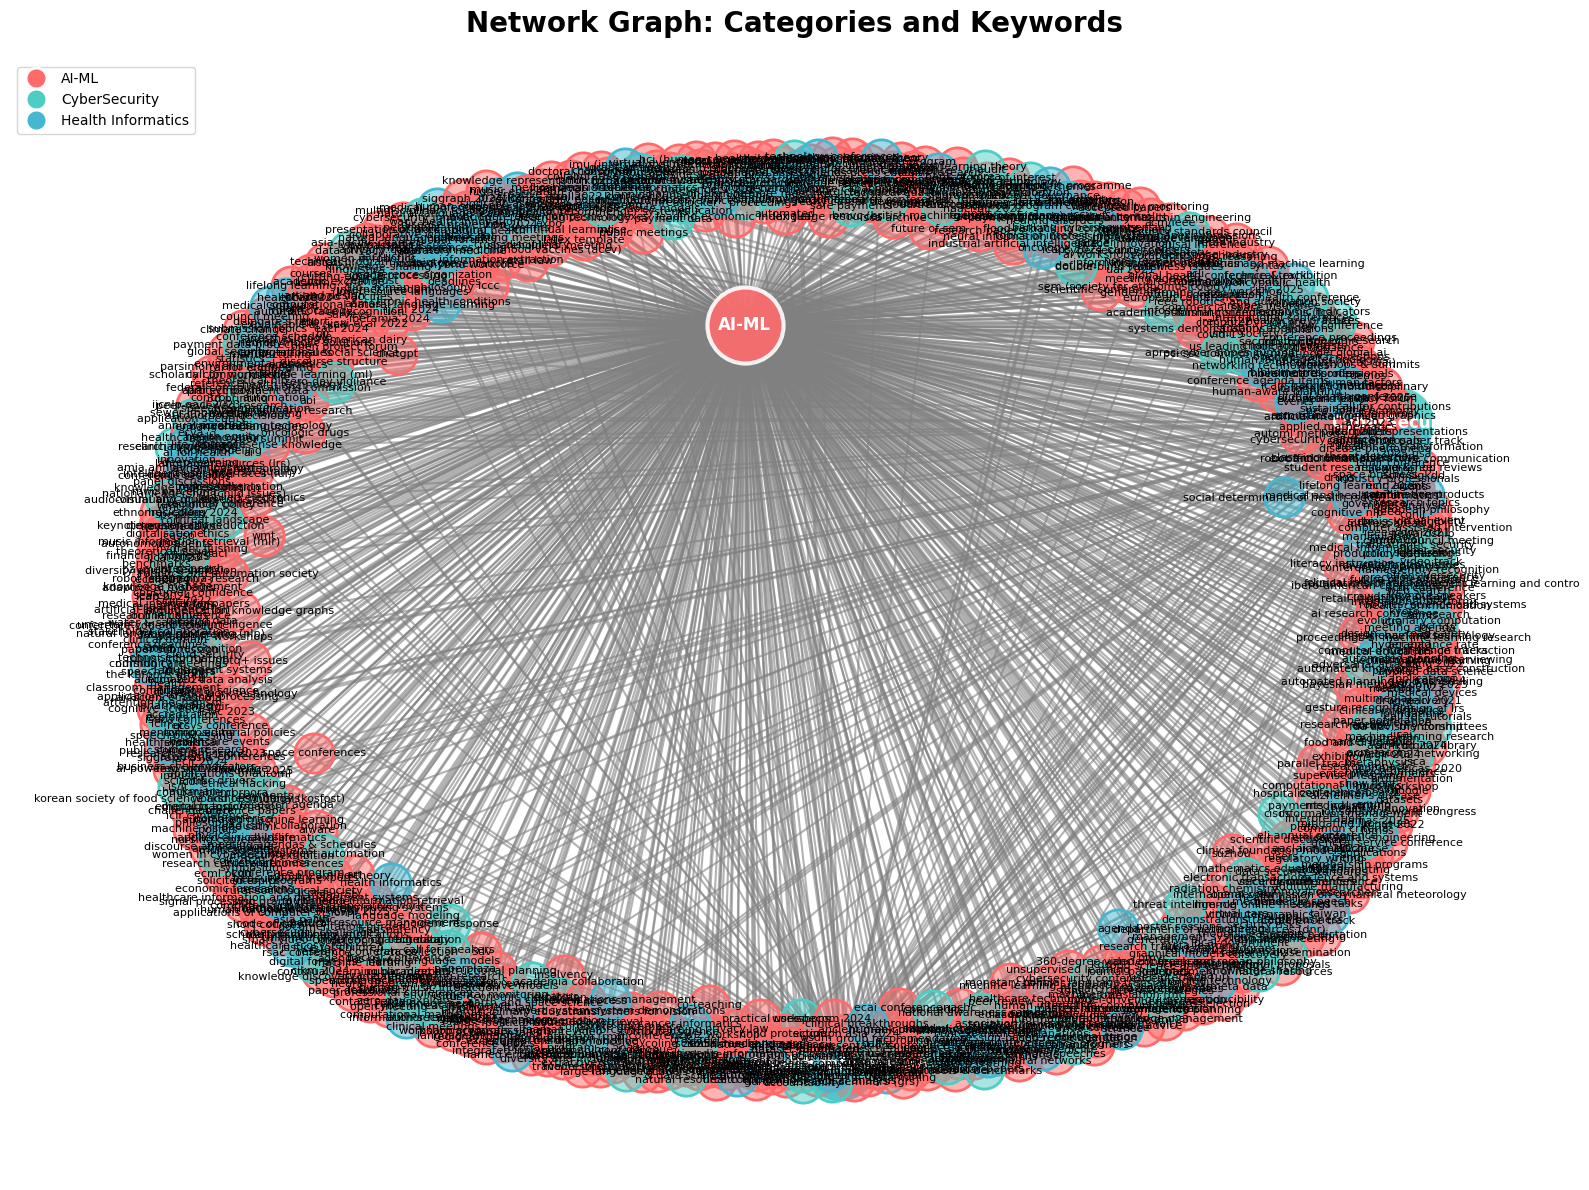

In [8]:
graph = create_network_graph(by_type)
graph

In [9]:
analyze_network(graph)

Network Analysis:
Number of nodes: 1123
Number of edges: 1169
Network density: 0.002

Top 5 nodes by degree centrality:
  AI-ML: 0.781
  CyberSecurity: 0.146
  Health Informatics: 0.115
  artificial intelligence: 0.003
  conferences: 0.003


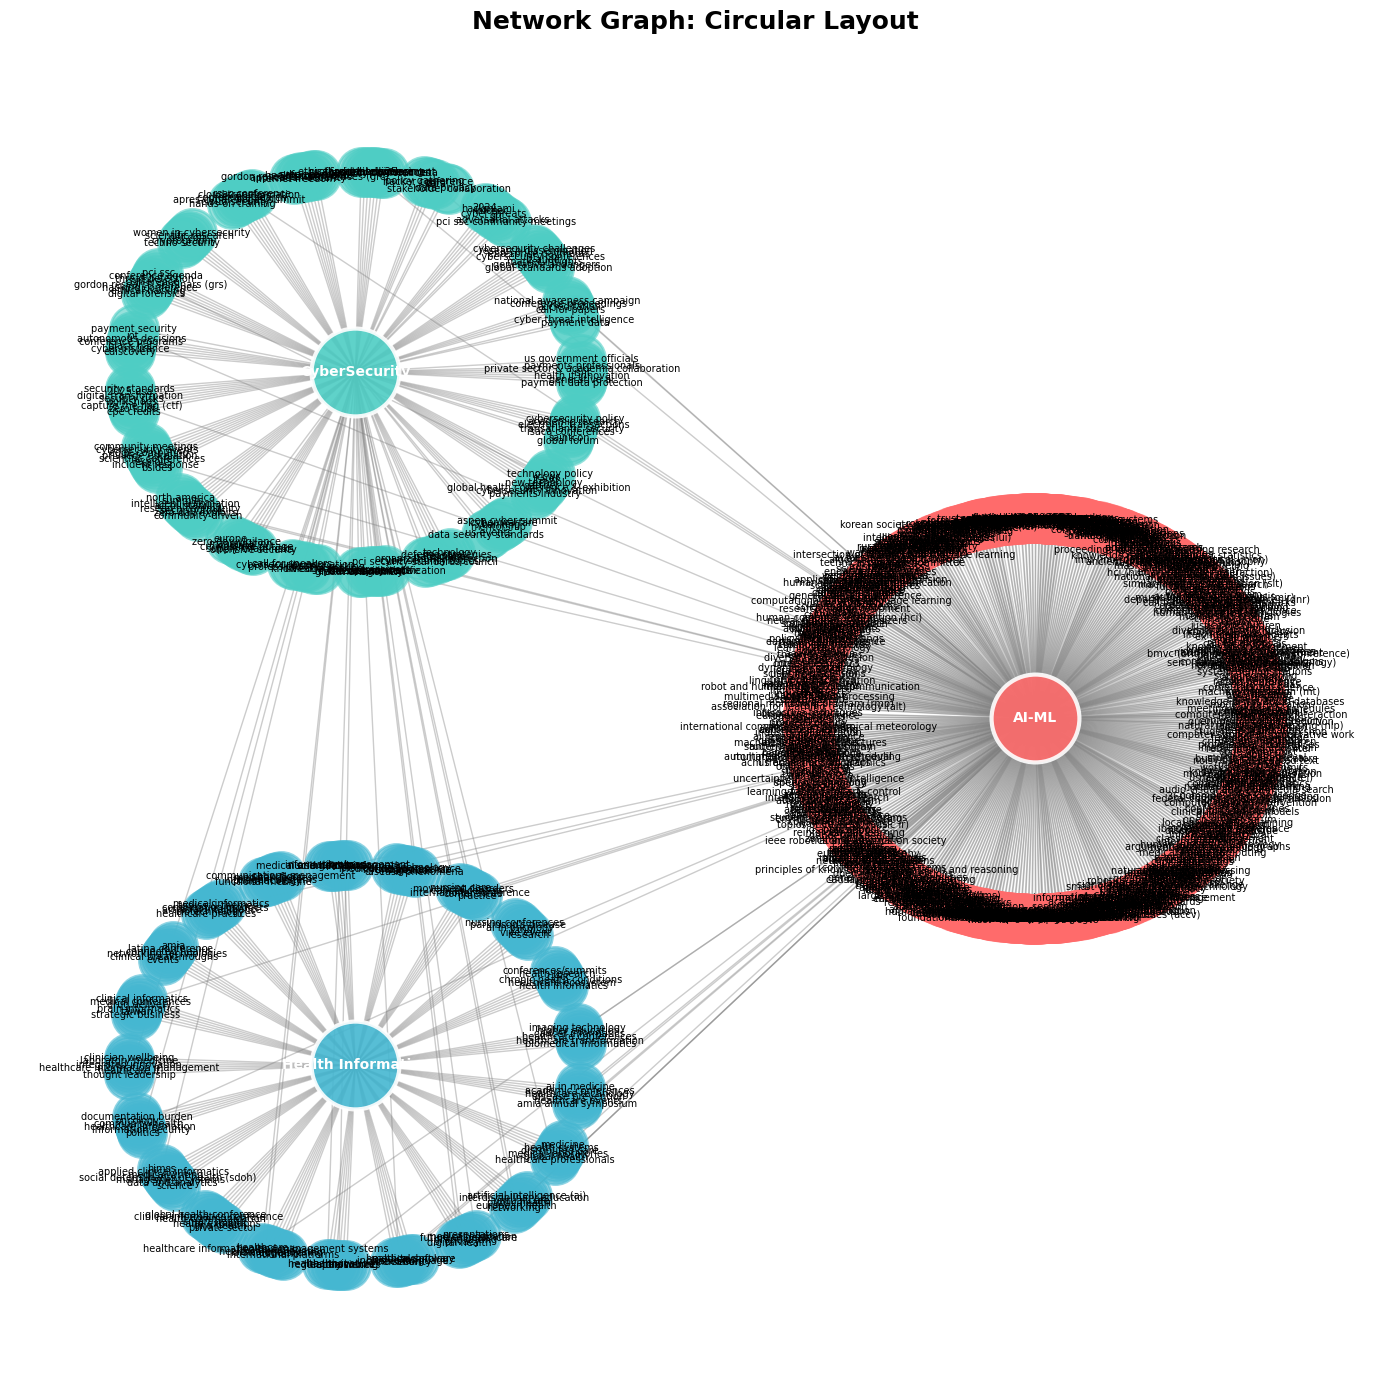

In [10]:
create_circular_layout_graph(by_type)

In [11]:
#with the most frequent

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
import re

In [21]:
# Define keywords to ignore
ignore_keywords = ['cybersecurity' , 'healthcare' ,'academic', 'himss' , 'aistats', 'ai' , 'workshops', 'conference', 'conferences', 'call for papers' , 'artificial intelligence' , 'proceddings' , 'submissions' , 'call for speakers']
ignore_keywords = ['waymo']
# Function to clean unwanted keywords
def clean_keywords(keyword_list):
    cleaned = []
    for kw in keyword_list:
        kw_lower = kw.lower().strip()
        if not any(re.search(rf'\b{word}\b', kw_lower) for word in ignore_keywords):
            cleaned.append(kw)
    return cleaned

# Step 1 (updated): Convert keywords string to list and clean them
keyword_counts = {}
for type_name, keywords in by_type.items():
    keyword_list = [kw.strip() for kw in keywords.split(',')]
    keyword_list = clean_keywords(keyword_list)
    counter = Counter(keyword_list)
    keyword_counts[type_name] = counter

# Step 2: Select top 5 keywords for each type
top_keywords = {}
for type_name, counter in keyword_counts.items():
    top = counter.most_common(1000)
    top_keywords[type_name] = set([kw for kw, _ in top])

# Step 3: Build keyword-to-type mapping
keyword_to_types = {}
for type_name, keywords in top_keywords.items():
    for keyword in keywords:
        if keyword not in keyword_to_types:
            keyword_to_types[keyword] = set()
        keyword_to_types[keyword].add(type_name)
keyword_to_types

{"wsdm'23": {'AI-ML'},
 'colm': {'AI-ML'},
 'latin america': {'AI-ML'},
 'tutorial program': {'AI-ML'},
 'uai 2021': {'AI-ML'},
 'classroom management': {'AI-ML'},
 'resume & reel reviews': {'AI-ML'},
 'acm chi 2025': {'AI-ML'},
 'transformers for vision': {'AI-ML'},
 'scientific forum': {'AI-ML'},
 'sports safety': {'AI-ML'},
 'theoretical nlp': {'AI-ML'},
 'conference code of conduct': {'AI-ML'},
 'agendas': {'AI-ML'},
 'argumentation knowledge graphs': {'AI-ML'},
 'gesture recognition': {'AI-ML'},
 'similar language translation (slt)': {'AI-ML'},
 'edics topic': {'AI-ML'},
 'doctoral consortium': {'AI-ML'},
 'icra (conference)': {'AI-ML'},
 'speech science': {'AI-ML'},
 'learning for dynamics & control': {'AI-ML'},
 'robotics and automation society': {'AI-ML'},
 'reproducibility': {'AI-ML'},
 'causal representation learning': {'AI-ML'},
 'research community': {'AI-ML', 'CyberSecurity'},
 'ijcai 2023': {'AI-ML'},
 'big data': {'AI-ML'},
 'environmental issues': {'AI-ML'},
 'proceedin

In [22]:
# Step 4: Create network graph
G = nx.Graph()
for type_name in by_type.index:
    G.add_node(type_name, bipartite=0, color='skyblue')

for keyword, types in keyword_to_types.items():
    G.add_node(keyword, bipartite=1, color='lightgreen')
    for type_name in types:
        G.add_edge(type_name, keyword)

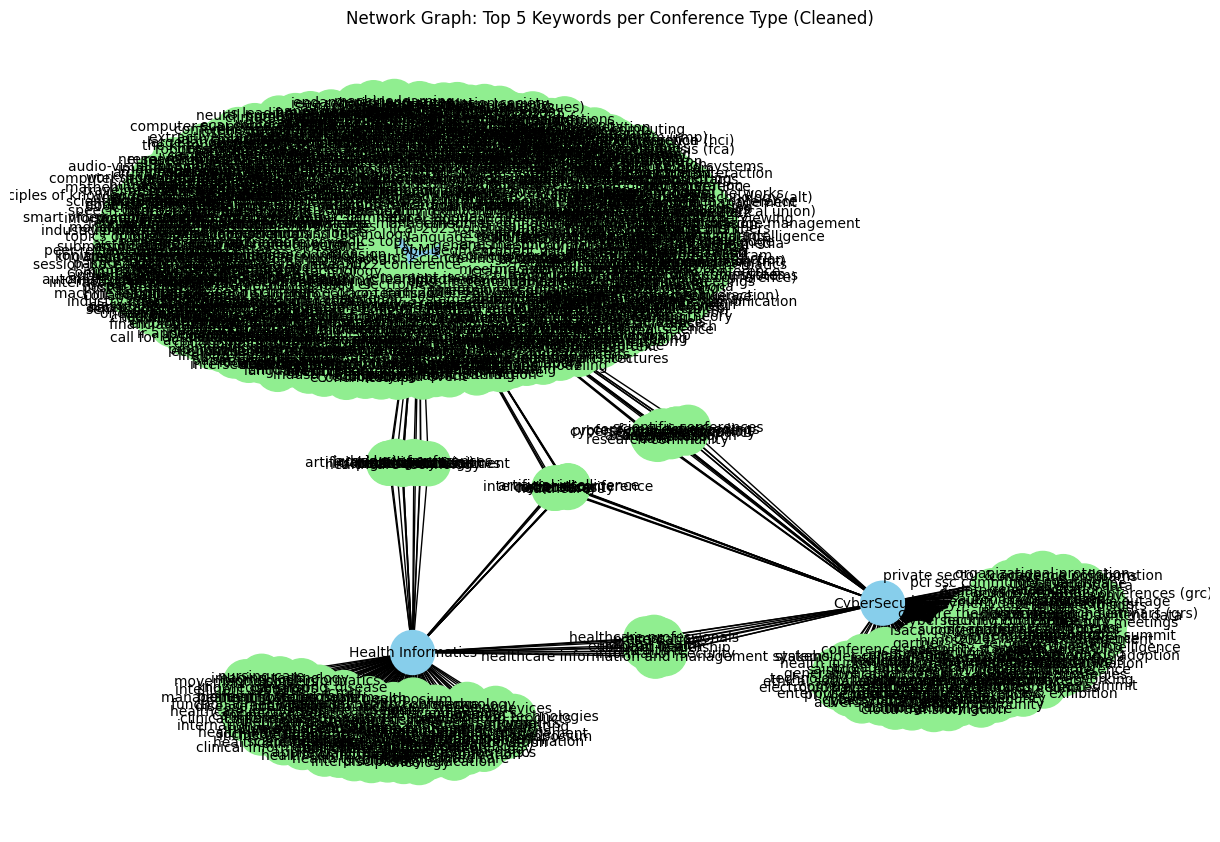

In [23]:
# Step 5: Draw network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1000, font_size=10)
plt.title("Network Graph: Top 5 Keywords per Conference Type (Cleaned)")
plt.show()

In [24]:
# Step 6: Compute intersections
ai_ml_keywords = top_keywords.get('AI-ML', set())
cybersecurity_keywords = top_keywords.get('CyberSecurity', set())
health_informatics_keywords = top_keywords.get('Health Informatics', set())

ai_cyber = ai_ml_keywords & cybersecurity_keywords
ai_health = ai_ml_keywords & health_informatics_keywords
cyber_health = cybersecurity_keywords & health_informatics_keywords
all_three = ai_ml_keywords & cybersecurity_keywords & health_informatics_keywords

# Display intersections
print("AI-ML & CyberSecurity:", ai_cyber)
print("AI-ML & Health Informatics:", ai_health)
print("CyberSecurity & Health Informatics:", cyber_health)
print("Intersection of all three:", all_three)


AI-ML & CyberSecurity: {'workshops', 'accountability', 'conference proceedings', 'cybersecurity certification', 'academic research', 'artificial intelligence', 'research community', 'iot', 'healthcare', 'conferences', 'networking', 'exhibition', 'professional development', 'conference', 'cybersecurity', 'privacy', 'international conference', 'data', 'scientific conferences', 'cybersecurity policy', 'ai'}
AI-ML & Health Informatics: {'information management', 'public health', 'medical conferences', 'artificial intelligence', 'hybrid conference', 'healthcare', 'conferences', 'networking', 'community health', 'innovation', 'academic conferences', 'cybersecurity', 'privacy', 'artificial intelligence (ai)', 'research', 'international conference', 'healthcare technology', 'higher education', 'ai'}
CyberSecurity & Health Informatics: {'digital health', 'health it', 'cybersecurity', 'european health', 'privacy', 'networking', 'thought leadership', 'healthcare professionals', 'healthcare inform

In [25]:
# Calculate unique intersections (removing the overlap with all three)
ai_cyber_only = ai_cyber - all_three
ai_health_only = ai_health - all_three
cyber_health_only = cyber_health - all_three

In [26]:
import matplotlib.patches as patches


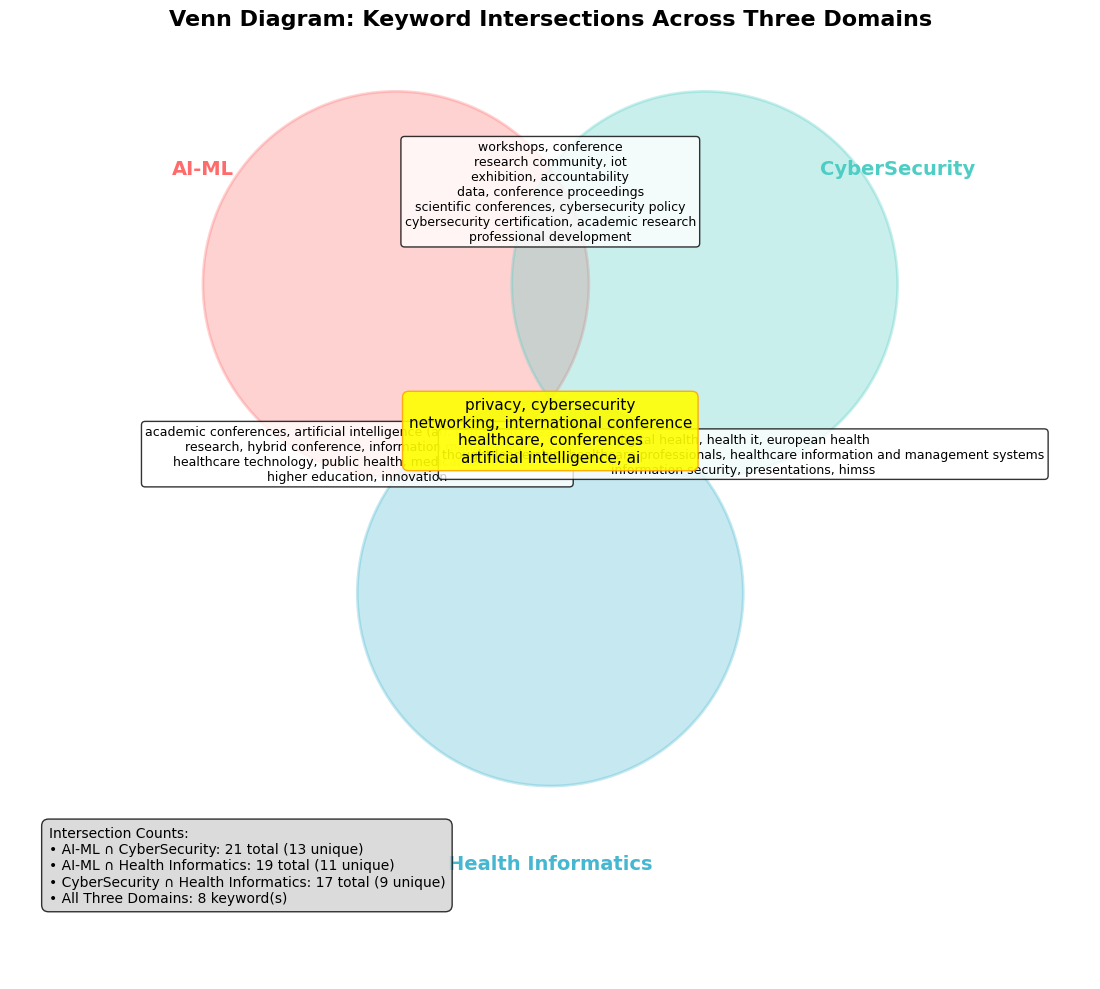

In [27]:
# Create figure
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Define circle parameters
circle_radius = 2.5
circle_centers = {
    'AI-ML': (-2.0, 2.0),
    'CyberSecurity': (2.0, 2.0),
    'Health Informatics': (0, -2.0)
}

# Colors for each domain
colors = {
    'AI-ML': '#FF6B6B',
    'CyberSecurity': '#4ECDC4', 
    'Health Informatics': '#45B7D1'
}

# Draw circles
circles = {}
for domain, center in circle_centers.items():
    circle = patches.Circle(center, circle_radius, 
                          facecolor=colors[domain], alpha=0.3, 
                          edgecolor=colors[domain], linewidth=2)
    ax.add_patch(circle)
    circles[domain] = circle

# Add domain labels outside circles
label_positions = {
    'AI-ML': (-4.5, 3.5),
    'CyberSecurity': (4.5, 3.5),
    'Health Informatics': (0, -5.5)
}

for domain, pos in label_positions.items():
    ax.text(pos[0], pos[1], domain, fontsize=14, fontweight='bold', 
           ha='center', va='center', color=colors[domain])

# Function to wrap text nicely
def wrap_keywords(keywords, max_per_line=2):
    keyword_list = list(keywords)
    if len(keyword_list) <= max_per_line:
        return '\n'.join(keyword_list)
    else:
        lines = []
        for i in range(0, len(keyword_list), max_per_line):
            lines.append(', '.join(keyword_list[i:i+max_per_line]))
        return '\n'.join(lines)

# Add intersection text
# AI-ML & CyberSecurity only (top intersection)
if ai_cyber_only:
    ax.text(0, 3.2, wrap_keywords(ai_cyber_only), fontsize=9, ha='center', va='center',
           bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# AI-ML & Health Informatics only (left intersection) 
if ai_health_only:
    ax.text(-2.5, -0.2, wrap_keywords(ai_health_only, 3), fontsize=9, ha='center', va='center',
           bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# CyberSecurity & Health Informatics only (right intersection)
if cyber_health_only:
    ax.text(2.5, -0.2, wrap_keywords(cyber_health_only, 3), fontsize=9, ha='center', va='center',
           bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Center intersection (all three)
if all_three:
    ax.text(0, 0.1, wrap_keywords(all_three), fontsize=11, ha='center', va='center',
           bbox=dict(boxstyle='round,pad=0.4', facecolor='yellow', alpha=0.9, edgecolor='orange'))

# Add title
ax.set_title('Venn Diagram: Keyword Intersections Across Three Domains', 
            fontsize=16, fontweight='bold', pad=20)

# Set equal aspect ratio and remove axes
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 5)
ax.set_aspect('equal')
ax.axis('off')

# Add legend with counts
legend_text = f"""Intersection Counts:
• AI-ML ∩ CyberSecurity: {len(ai_cyber)} total ({len(ai_cyber_only)} unique)
• AI-ML ∩ Health Informatics: {len(ai_health)} total ({len(ai_health_only)} unique)  
• CyberSecurity ∩ Health Informatics: {len(cyber_health)} total ({len(cyber_health_only)} unique)
• All Three Domains: {len(all_three)} keyword(s)"""

ax.text(-6.5, -6, legend_text, fontsize=10, 
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

In [28]:
# Print detailed breakdown
print("Detailed Intersection Analysis:")
print("=" * 60)
print(f"AI-ML ∩ CyberSecurity ({len(ai_cyber)} keywords):")
for keyword in sorted(ai_cyber):
    print(f"  • {keyword}")
print()

print(f"AI-ML ∩ Health Informatics ({len(ai_health)} keywords):")
for keyword in sorted(ai_health):
    print(f"  • {keyword}")
print()

print(f"CyberSecurity ∩ Health Informatics ({len(cyber_health)} keywords):")
for keyword in sorted(cyber_health):
    print(f"  • {keyword}")
print()

print(f"All Three Domains ({len(all_three)} keyword):")
for keyword in sorted(all_three):
    print(f"  • {keyword}")
print()

print("Unique to Pairwise Intersections:")
print("-" * 40)
print(f"AI-ML ∩ CyberSecurity only: {sorted(ai_cyber_only)}")
print(f"AI-ML ∩ Health Informatics only: {sorted(ai_health_only)}")
print(f"CyberSecurity ∩ Health Informatics only: {sorted(cyber_health_only)}")

Detailed Intersection Analysis:
AI-ML ∩ CyberSecurity (21 keywords):
  • academic research
  • accountability
  • ai
  • artificial intelligence
  • conference
  • conference proceedings
  • conferences
  • cybersecurity
  • cybersecurity certification
  • cybersecurity policy
  • data
  • exhibition
  • healthcare
  • international conference
  • iot
  • networking
  • privacy
  • professional development
  • research community
  • scientific conferences
  • workshops

AI-ML ∩ Health Informatics (19 keywords):
  • academic conferences
  • ai
  • artificial intelligence
  • artificial intelligence (ai)
  • community health
  • conferences
  • cybersecurity
  • healthcare
  • healthcare technology
  • higher education
  • hybrid conference
  • information management
  • innovation
  • international conference
  • medical conferences
  • networking
  • privacy
  • public health
  • research

CyberSecurity ∩ Health Informatics (17 keywords):
  • ai
  • artificial intelligence
  • conferen